# Plotting ILAMB Data
Generates plots of observational data in ILAMB

In [1]:
import xarray as xr
import fates_calibration_library.ilamb_plotting as plotting
import fates_calibration_library.utils as utils

In [17]:
plot_config_file = '/glade/work/afoster/FATES_calibration/scripts/configs/ilamb_conversion.yaml'
plot_config = utils.get_config_file(plot_config_file)

In [18]:
# compiled ILAMB observational data
ilamb_obs_file = '/glade/work/afoster/FATES_calibration/observations/all_ILAMB_obs.nc'
ilamb_dat = xr.open_dataset(ilamb_obs_file)

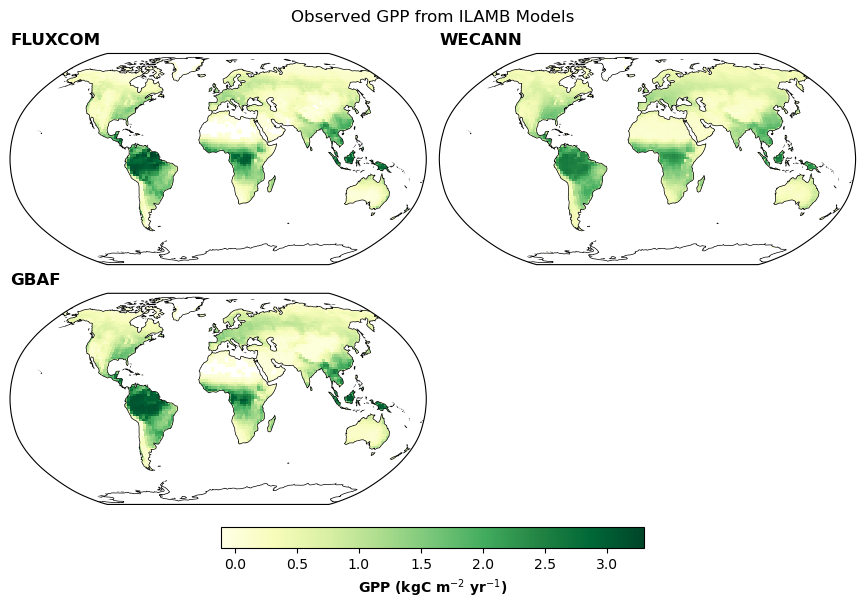

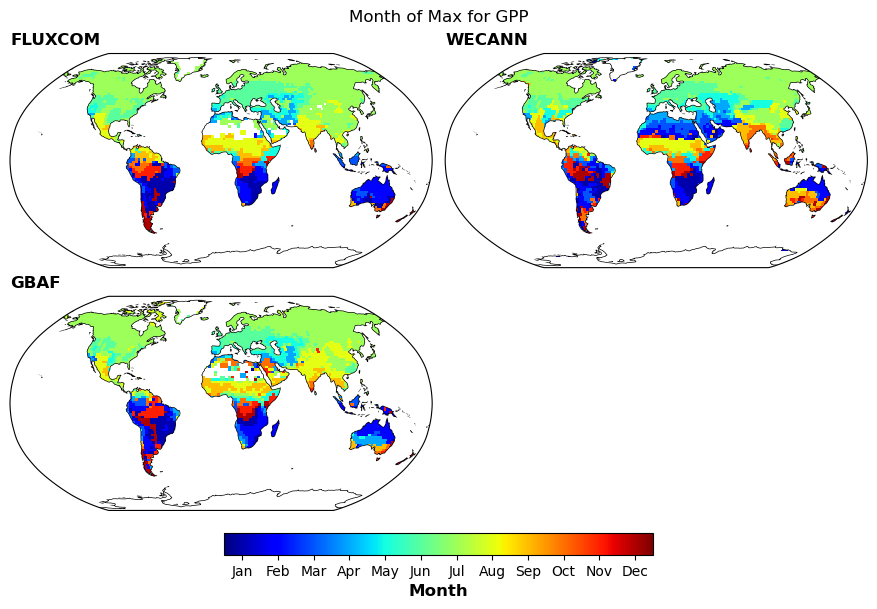

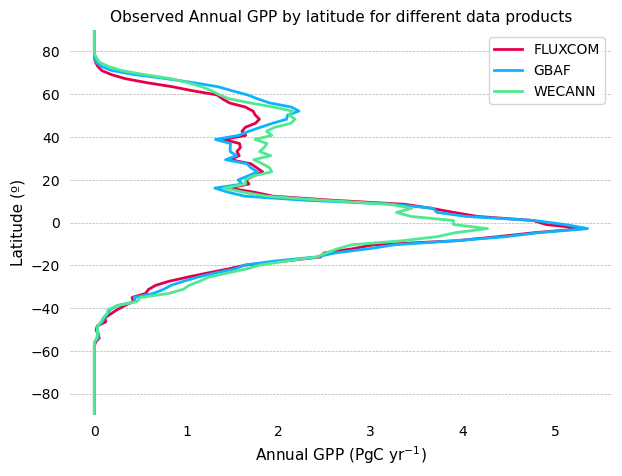

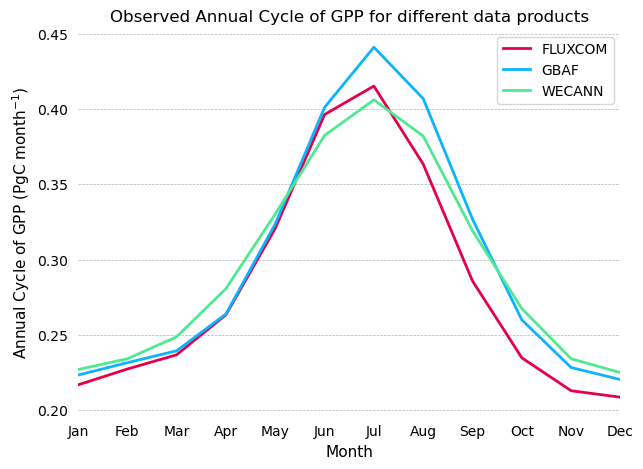

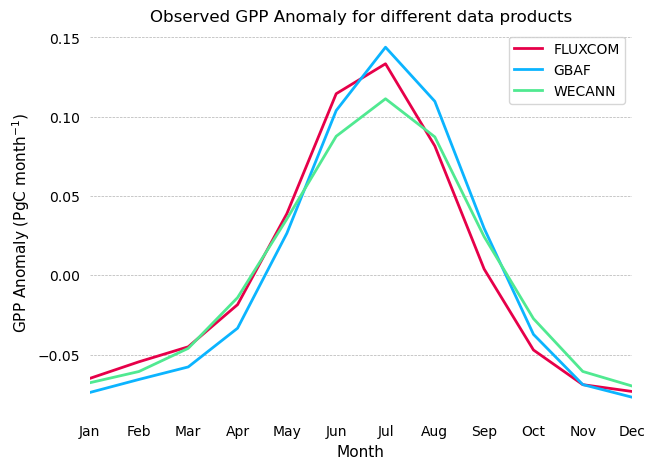

In [25]:
plotvar = 'GPP'
plotting.plot_ilamb_var(ilamb_dat, plot_config[plotvar]['var'], plot_config[plotvar])